<a href="https://colab.research.google.com/github/willismax/MediaSystem-Python-Course/blob/main/01.Intro-Python/%E7%9B%A3%E7%9D%A3%E5%AD%B8%E7%BF%92%E6%87%89%E7%94%A8%E6%95%99%E5%AD%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 資料分析與建立模型 - 監督學習應用

[HackMD版](https://hackmd.io/@wiimax/ryJnYEA7C)

## 目標
本教案旨在教導學生如何應用監督學習技術進行數據分析與建立模型。學生將學習基本概念、常用技術與工具，並通過實例操作，掌握監督學習的應用。

## 教學大綱
1. 引言
2. 資料準備
3. 分類算法
4. 迴歸算法
5. 模型評估與選擇
6. 實際案例分析
7. 實戰練習
8. 參考資料

## 引言
### 監督學習的基本概念
監督學習是一種機器學習方法，通過已標註的數據進行訓練，來預測或分類新數據。它包含兩大類：分類和迴歸。簡單來說，分類是將東西分成不同的類別，如識別郵件是垃圾郵件還是正常郵件；而迴歸是預測一個連續的值，如預測房價。

### 監督學習的應用場景
監督學習應用廣泛，如垃圾郵件檢測、信用風險評估、銷售預測等。例如，你可以用監督學習來預測明天的天氣，或是檢查某封郵件是否為垃圾郵件。

## 資料準備
### 資料清洗與預處理
1. 缺失值處理：移除或填補缺失值
2. 資料標準化與正規化：將數據調整到相似的範圍內，便於模型處理。

In [3]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 使用 Iris 資料集
data = load_iris()
X = data.data
y = data.target

# 標準化範例
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
df = pd.DataFrame(X_scaled, columns=data.feature_names)
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


### 特徵選擇與工程
1. 特徵選擇：相關性分析、PCA
2. 特徵工程：特徵組合、衍生特徵

In [5]:
from sklearn.decomposition import PCA

# PCA範例
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 結果
result = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
result['target'] = y
result.head()

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


## 分類算法
### k-最近鄰 (k-NN)
簡單且易於理解的分類算法，基於鄰近點的標籤進行分類。

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# k-NN範例
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

# 評估
cm = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
cm, accuracy, recall, f1

(array([[10,  0,  0],
        [ 0,  9,  0],
        [ 0,  0, 11]]),
 1.0,
 1.0,
 1.0)

### 決策樹
使用樹狀結構來做出決策，易於解釋。

In [7]:
from sklearn.tree import DecisionTreeClassifier

# 決策樹範例
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
predictions = tree.predict(X_test)

# 評估
cm = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
cm, accuracy, recall, f1

(array([[10,  0,  0],
        [ 0,  9,  0],
        [ 0,  0, 11]]),
 1.0,
 1.0,
 1.0)

### 隨機森林
由多棵決策樹組成的集成方法，提升模型穩定性和精度。

In [8]:
from sklearn.ensemble import RandomForestClassifier

# 隨機森林範例
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
predictions = forest.predict(X_test)

# 評估
cm = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
cm, accuracy, recall, f1

(array([[10,  0,  0],
        [ 0,  9,  0],
        [ 0,  0, 11]]),
 1.0,
 1.0,
 1.0)

### 支持向量機 (SVM)
透過找到最佳分隔超平面來進行分類。

In [9]:
from sklearn.svm import SVC

# SVM範例
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)

# 評估
cm = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
cm, accuracy, recall, f1

(array([[10,  0,  0],
        [ 0,  8,  1],
        [ 0,  0, 11]]),
 0.9666666666666667,
 0.9629629629629629,
 0.9658994032395567)

## 迴歸算法
### 線性迴歸
簡單且易於解釋的迴歾算法，適用於線性關係的資料。

波士頓房價資料(Kaggle)
- EDA: https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset
- 資料集: https://drive.google.com/file/d/16dRi6259-_zqURNCqLTuw8rQxsVAZRgj/view?usp=sharing

In [ ]:
# @title
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')
matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

In [16]:
import pandas as pd


# 檔案ID
file_id = '16dRi6259-_zqURNCqLTuw8rQxsVAZRgj'

# 構建可下載的URL
download_url = f'https://drive.google.com/uc?id={file_id}'

# 使用Pandas讀取CSV檔案
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv(download_url, delim_whitespace=True, names=column_names)

# 顯示資料前幾行
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Mean Squared Error: 24.291119474973485


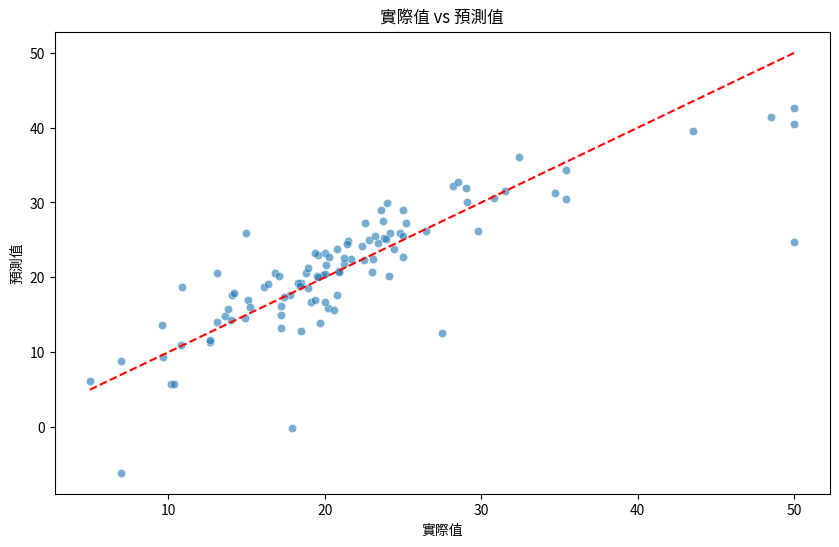

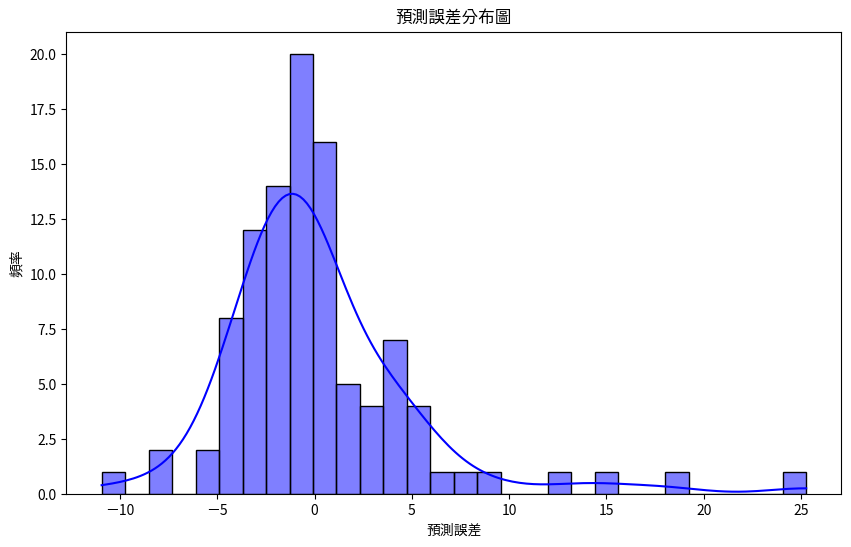

In [29]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 使用波士頓房價資料集 (官方資料集棄用)
def load_boston():
    # 檔案ID
    file_id = '16dRi6259-_zqURNCqLTuw8rQxsVAZRgj'
    # 構建可下載的URL
    download_url = f'https://drive.google.com/uc?id={file_id}'

    # 使用Pandas讀取CSV檔案
    column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
    df = pd.read_csv(download_url, delim_whitespace=True, names=column_names)
    print(df.head())

    data_boston = df.drop('MEDV', axis=1).values
    target = df['MEDV'].values
    return data_boston, target

data_boston = load_boston()
X = data_boston[0]
y = data_boston[1]

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 線性迴歾範例
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

# 評估
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# 繪圖
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('實際值')
plt.ylabel('預測值')
plt.title('實際值 vs 預測值')
plt.show()

# 繪製預測誤差分布圖
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color='blue', bins=30)
plt.xlabel('預測誤差')
plt.ylabel('頻率')
plt.title('預測誤差分布圖')
plt.show()

### 多項式迴歸
多項式迴歸是線性迴歸的擴展，可以適應非線性數據。

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Mean Squared Error: 14.56643599827278


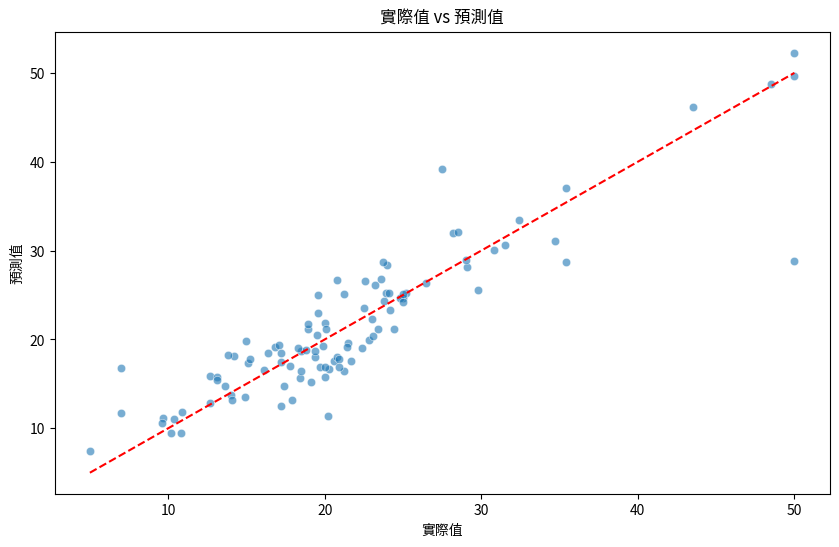

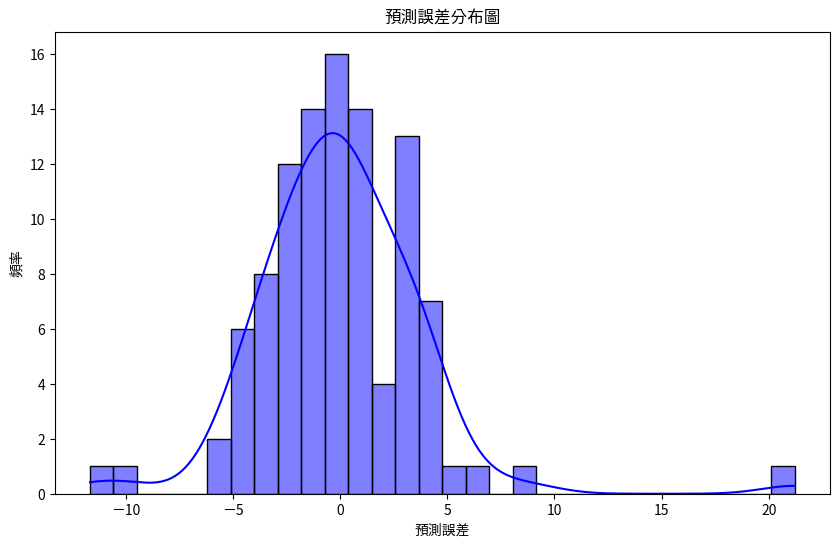

In [34]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

# 使用波士頓房價資料集 (官方資料集棄用)
def load_boston():
    # 檔案ID
    file_id = '16dRi6259-_zqURNCqLTuw8rQxsVAZRgj'
    # 構建可下載的URL
    download_url = f'https://drive.google.com/uc?id={file_id}'

    # 使用Pandas讀取CSV檔案
    column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
    df = pd.read_csv(download_url, delim_whitespace=True, names=column_names)
    print(df.head())

    data_boston = df.drop('MEDV', axis=1).values
    target = df['MEDV'].values
    return data_boston, target

data_boston = load_boston()
X = data_boston[0]
y = data_boston[1]

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 構建多項式特徵
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# 多項式回歸模型
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
predictions = poly_reg.predict(X_test_poly)

# 評估
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# 繪製實際值 vs 預測值散佈圖
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('實際值')
plt.ylabel('預測值')
plt.title('實際值 vs 預測值')
plt.show()

# 計算預測誤差
errors = y_test - predictions

# 繪製預測誤差分布圖
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color='blue', bins=30)
plt.xlabel('預測誤差')
plt.ylabel('頻率')
plt.title('預測誤差分布圖')
plt.show()


### 嶺迴歸與[Lasso迴歸](https://zh.wikipedia.org/zh-tw/Lasso%E7%AE%97%E6%B3%95)



這兩種算法通過加入正則化項來處理過擬合問題。


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Ridge Regression Mean Squared Error: 14.1420937553273
Lasso Regression Mean Squared Error: 15.206928180468262


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.738e+03, tolerance: 3.510e+00
  model = cd_fast.enet_coordinate_descent(


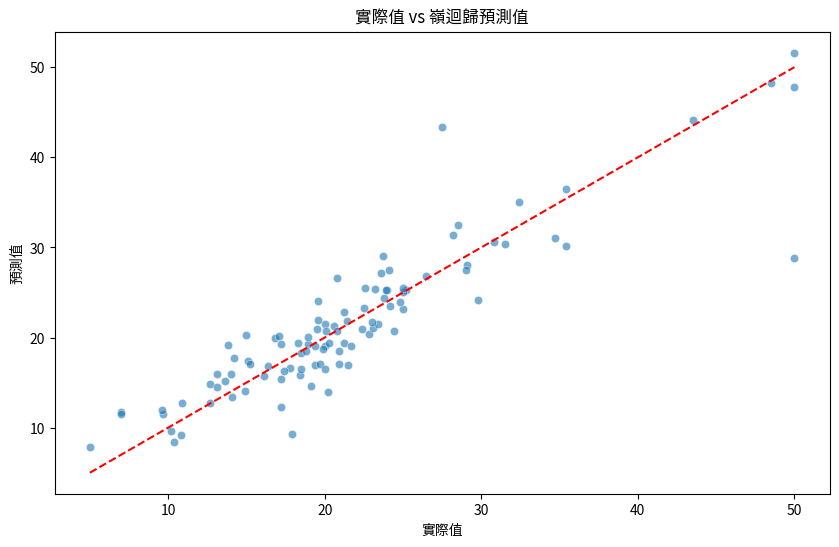

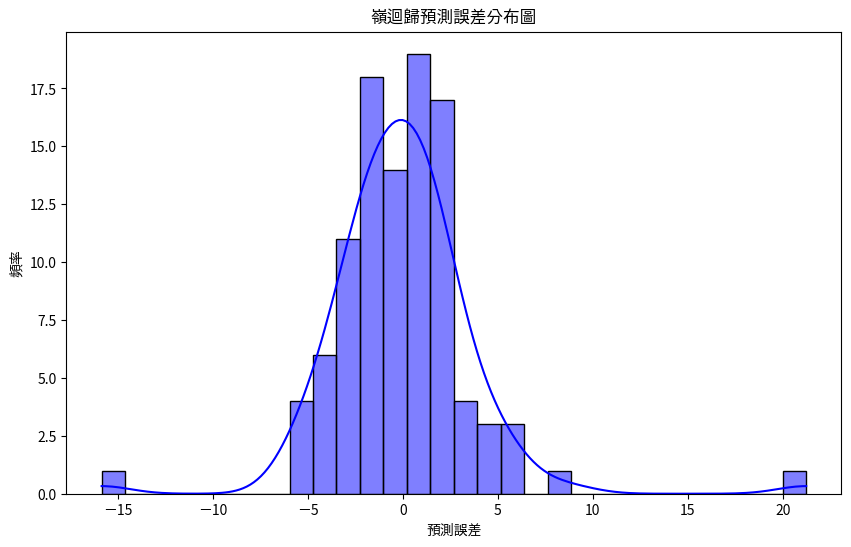

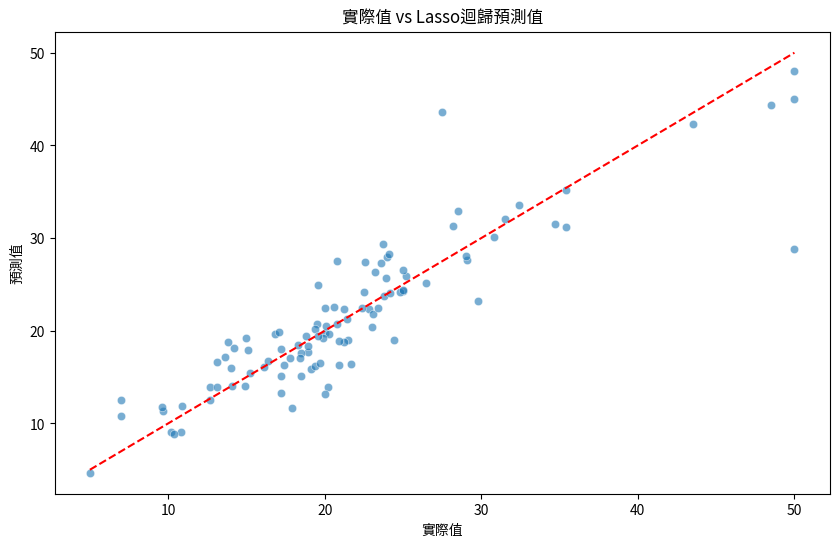

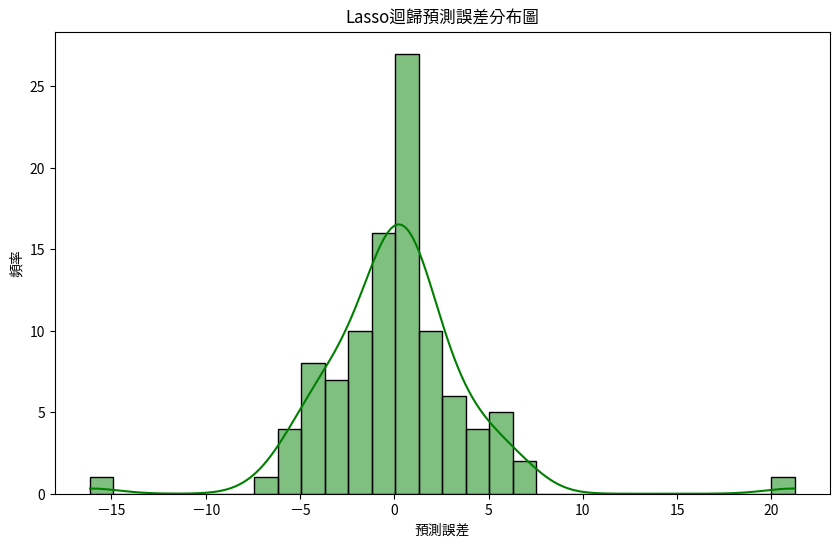

In [36]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

# 使用波士頓房價資料集 (官方資料集棄用)
def load_boston():
    # 檔案ID
    file_id = '16dRi6259-_zqURNCqLTuw8rQxsVAZRgj'
    # 構建可下載的URL
    download_url = f'https://drive.google.com/uc?id={file_id}'

    # 使用Pandas讀取CSV檔案
    column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
    df = pd.read_csv(download_url, delim_whitespace=True, names=column_names)
    print(df.head())

    data_boston = df.drop('MEDV', axis=1).values
    target = df['MEDV'].values
    return data_boston, target

data_boston = load_boston()
X = data_boston[0]
y = data_boston[1]

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 構建多項式特徵
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# 嶺迴歸模型
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_poly, y_train)
ridge_predictions = ridge_reg.predict(X_test_poly)

# 評估嶺迴歸
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print(f"Ridge Regression Mean Squared Error: {ridge_mse}")

# Lasso迴歸模型
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_poly, y_train)
lasso_predictions = lasso_reg.predict(X_test_poly)

# 評估Lasso迴歸
lasso_mse = mean_squared_error(y_test, lasso_predictions)
print(f"Lasso Regression Mean Squared Error: {lasso_mse}")

# 繪製實際值 vs 嶺迴歸預測值散佈圖
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=ridge_predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('實際值')
plt.ylabel('預測值')
plt.title('實際值 vs 嶺迴歸預測值')
plt.show()

# 計算嶺迴歸預測誤差
ridge_errors = y_test - ridge_predictions

# 繪製嶺迴歸預測誤差分布圖
plt.figure(figsize=(10, 6))
sns.histplot(ridge_errors, kde=True, color='blue', bins=30)
plt.xlabel('預測誤差')
plt.ylabel('頻率')
plt.title('嶺迴歸預測誤差分布圖')
plt.show()

# 繪製實際值 vs Lasso迴歸預測值散佈圖
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=lasso_predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('實際值')
plt.ylabel('預測值')
plt.title('實際值 vs Lasso迴歸預測值')
plt.show()

# 計算Lasso迴歸預測誤差
lasso_errors = y_test - lasso_predictions

# 繪製Lasso迴歸預測誤差分布圖
plt.figure(figsize=(10, 6))
sns.histplot(lasso_errors, kde=True, color='green', bins=30)
plt.xlabel('預測誤差')
plt.ylabel('頻率')
plt.title('Lasso迴歸預測誤差分布圖')
plt.show()


## 模型評估與選擇
### 混淆矩陣
混淆矩陣是一種評估分類模型準確性的工具。

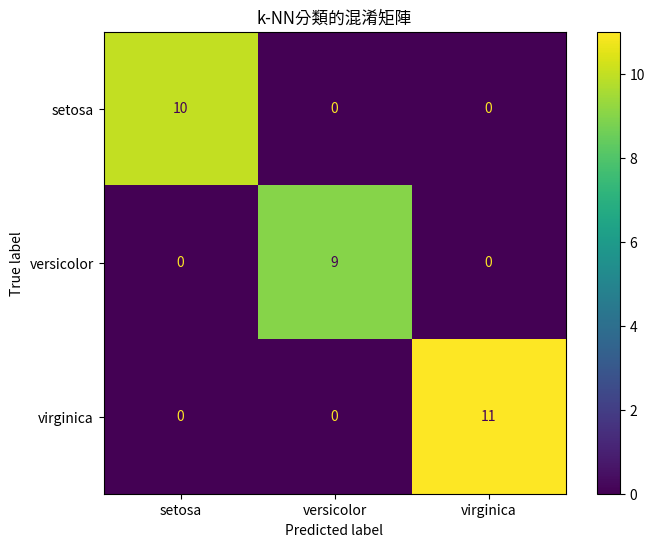

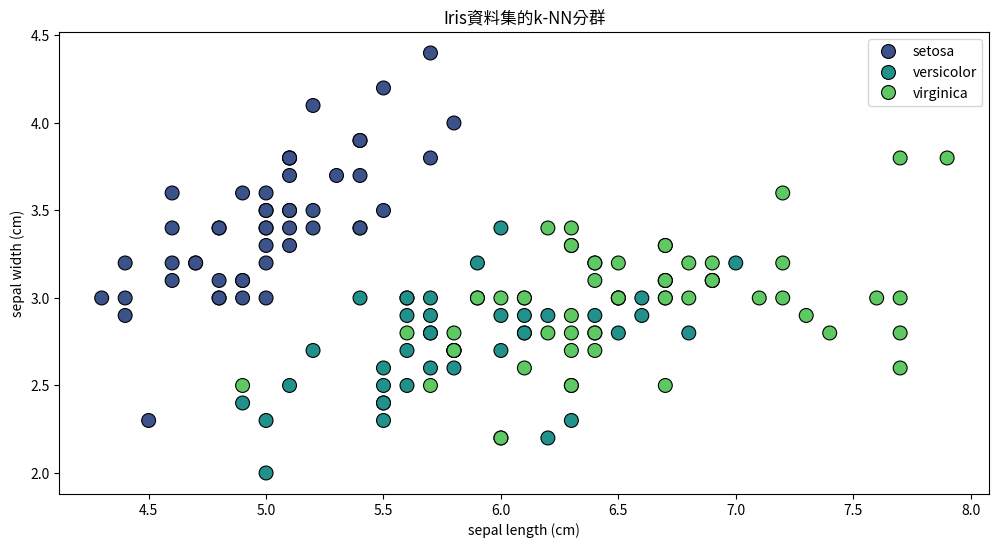

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 載入Iris資料集
iris = load_iris()
X = iris.data
y = iris.target

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練k-NN模型
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 預測
y_pred = knn.predict(X_test)

# 計算混淆矩陣
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=iris.target_names)

# 繪製混淆矩陣
fig, ax = plt.subplots(figsize=(8, 6))
cmd.plot(ax=ax)
plt.title('k-NN分類的混淆矩陣')
plt.show()

# 繪製散佈圖（僅選擇前兩個特徵進行可視化）
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y], palette='viridis', s=100, edgecolor='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Iris資料集的k-NN分群')
plt.show()


### 精度、召回率、F1分數
這些指標用於評估模型性能。

In [39]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

# 計算準確率, 召回率, F1分數
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 1.0
Recall: 1.0
F1 Score: 1.0


### 交叉驗證
交叉驗證通過多次分割數據集來評估模型穩定性。

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# 交叉驗證範例
scores = cross_val_score(model, X, y, cv=5)
scores

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

### ROC曲線與AUC
ROC曲線和AUC用於評估分類模型性能的圖形工具。

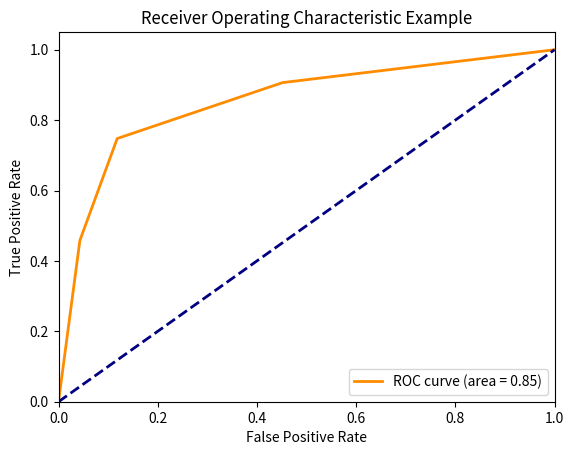

In [42]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 生成二元分類資料集
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練模型
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# 預測機率
y_score = model.predict_proba(X_test)[:, 1]

# 計算ROC曲線和AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)

# 繪製ROC曲線
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()


## 實際案例分析
### 分類問題實例：Iris 資料集分類

In [43]:
import pandas as pd
from sklearn.datasets import load_iris

# 讀取 Iris 資料集
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 實戰練習
Kaggle競賽資料集分析

- 選擇一個Kaggle競賽資料集
- 進行完整的數據分析與建模流程
- 提交競賽結果並進行討論

## 參考資料
- [Scikit-learn Documentation](https://scikit-learn.org/stable/documentation.html)
- [Kaggle Datasets](https://www.kaggle.com/datasets)
- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)